In [1]:
using AtmosphericModels, Plots

# Initializing Atmospheric Model

In [2]:
am = AtmosphericModel();

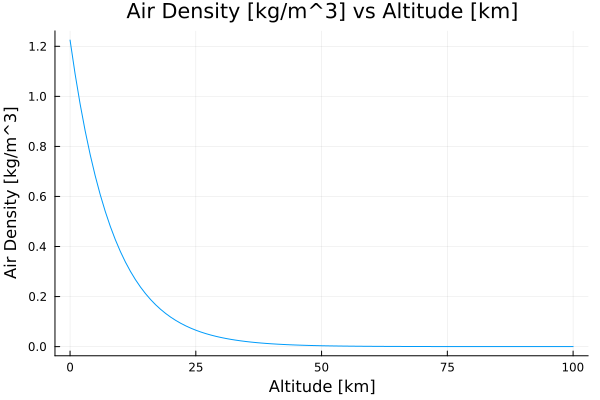

In [3]:
h = 0:1e3:(100e3)
ρ = [calc_rho(am, alt) for alt in h]

plot(h./(1e3), ρ, label=false)
xlabel!("Altitude [km]")
ylabel!("Air Density [kg/m^3]")
title!("Air Density [kg/m^3] vs Altitude [km]")

In [4]:
savefig("../figures/rho_v_alt.png");

# Drag Analysis

We define the drag function to be of the form:
$$
D = \frac{1}{2} \rho C_d v^2 A
$$
where $D$ is the drag force, $\rho$ is the air density, $C_d$ is the drag coefficient, $v$ is the airspeed, and $A$ is reference area.

In [5]:
"""
drag(cd, h, v, A)
- Inputs:
-- cd: coefficient of drag
-- h: altitude
-- v: velocity
-- A: reference cross-sectional area
- Outputs:
-- Drag Force
"""
function drag(cd, h, v, A)
    return (0.5).*cd.*[calc_rho(am, alt) for alt in h].*([(vel^2) for vel in v]).*A
end

drag

We define the following parameters for the vehicle/object we want to conduct a drag characterization on:

In [6]:
cd = 0.1;
A = 0.75; # m^2

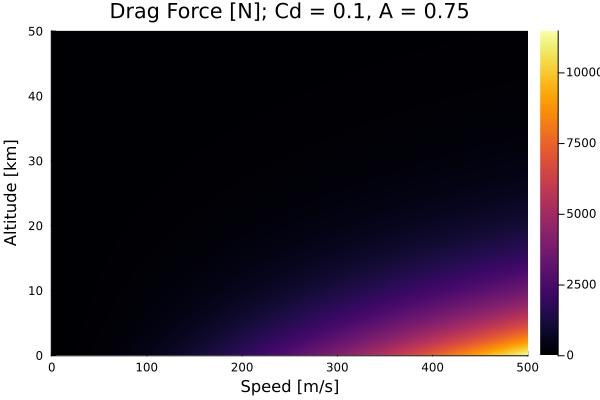

In [7]:
h_range = 0:100:50e3; # altitudes [m]
v_range = 0:1:500; # speeds [m/s]

hv_pairs = [[h,v] for h in h_range for v in v_range]
drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
drag_forces = reshape(drag_forces, length(v_range), length(h_range))

heatmap(v_range, h_range./(1e3), drag_forces')
xlabel!("Speed [m/s]")
ylabel!("Altitude [km]")
title!("Drag Force [N]; Cd = $(cd), A = $(A)")

In [8]:
savefig("../figures/drag_at_highspeed.png");

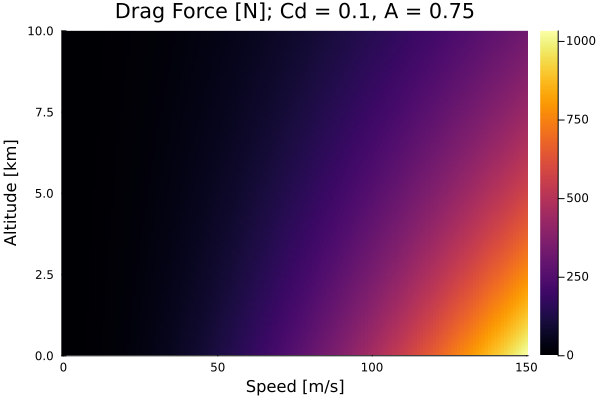

In [9]:
h_range = 0:1:10e3; # altitudes [m]
v_range = 0:1:150; # speeds [m/s]

hv_pairs = [[h,v] for h in h_range for v in v_range]
drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
drag_forces = reshape(drag_forces, length(v_range), length(h_range))

heatmap(v_range, h_range./(1e3), drag_forces')
xlabel!("Speed [m/s]")
ylabel!("Altitude [km]")
title!("Drag Force [N]; Cd = $(cd), A = $(A)")

In [10]:
savefig("../figures/drag_at_lowspeed.png");

# C_d Impact
We rerun the above analysis for a fixed $A$ but while varying $C_d$

┌ Info: Saved animation to c:\Users\kavin\Documents\Liquid_Rocketry\modeling\OneDimensionalModel\figures\drag_cd_sweep.gif
└ @ Plots C:\Users\kavin\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\kavin\\Documents\\Liquid_Rocketry\\modeling\\OneDimensionalModel\\figures\\drag_cd_sweep.gif")
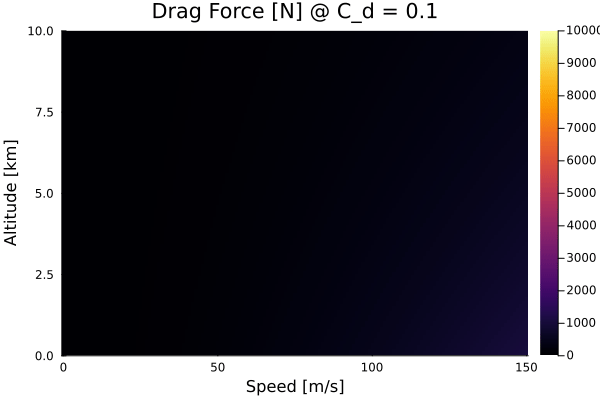

In [11]:
h_range = 0:1:10e3; # altitudes [m]
v_range = 0:1:150; # speeds [m/s]
A = 0.75; # m^2

cd_sweep = @animate for cd in 0.1:0.05:0.9
    drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
    drag_forces = reshape(drag_forces, length(v_range), length(h_range))

    heatmap(v_range, h_range./(1e3), drag_forces')
    xlabel!("Speed [m/s]")
    ylabel!("Altitude [km]")
    title!("Drag Force [N] @ C_d = $(cd)")
    plot!(clim=(0, 1e4))
end
gif(cd_sweep, "../figures/drag_cd_sweep.gif")

# Area Impact
We rerun the drag analysis for a fixed $C_d$ while varying $A$

┌ Info: Saved animation to c:\Users\kavin\Documents\Liquid_Rocketry\modeling\OneDimensionalModel\figures\drag_area_sweep.gif
└ @ Plots C:\Users\kavin\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\kavin\\Documents\\Liquid_Rocketry\\modeling\\OneDimensionalModel\\figures\\drag_area_sweep.gif")
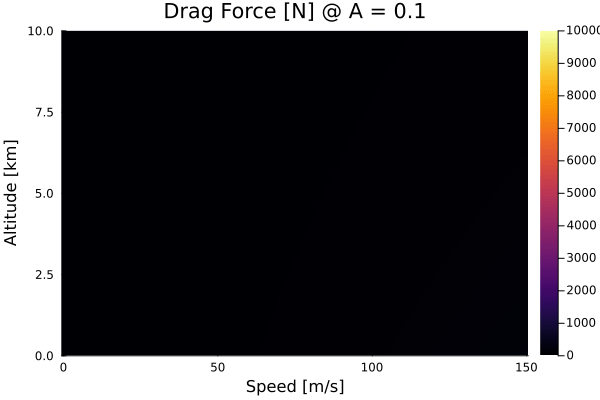

In [12]:
h_range = 0:1:10e3; # altitudes [m]
v_range = 0:1:150; # speeds [m/s]
c_d = 0.1; # m^2

area_sweep = @animate for A in 0.1:0.1:4
    drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
    drag_forces = reshape(drag_forces, length(v_range), length(h_range))

    heatmap(v_range, h_range./(1e3), drag_forces')
    xlabel!("Speed [m/s]")
    ylabel!("Altitude [km]")
    title!("Drag Force [N] @ A = $(A)")
    plot!(clim=(0, 1e4))
end
gif(area_sweep, "../figures/drag_area_sweep.gif")